# K-means

* **K-means算法步骤**
   1. 算法分为两个步骤，第一个for循环是赋值步骤，即：对于每一个样例，计算其应该属于的类。
   2. 第二个for循环是聚类中心的移动，即：对于每一个类，重新计算该类的质心。
   
   
* **随机初始化**


* **选择聚类数**
![elbow](./Image/elbow.png)

# K-means练习

**包括两部分，实现k-means以及利用其实现图片压缩**

## 2D数据k-means

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sb
from scipy.io import loadmat

**导入数据**

dict_keys(['__header__', '__version__', '__globals__', 'X'])
         X1        X2
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894


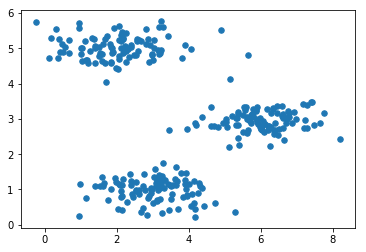

In [20]:
data  = loadmat("./data/ex7data2.mat")
print(data.keys())
data2 = pd.DataFrame(data.get("X"),columns=["X1","X2"])
print(data2.head(n=5))
plt.scatter(data2["X1"],data2["X2"],s=30)
plt.show()
X = data["X"]

**实现算法，主要包括2个函数：计算中心，给样本赋类别,以及一个随机初始化过程**

In [75]:
def compute_centroids(X,idx,k):
    m,n = X.shape
    centroids = np.zeros((k,n))
    
    for i in range(k):
        idex = np.where(idx==i)
        centroids[i,:] = np.sum(X[idx==i,:],axis=0).reshape(1,-1)/len(idex[0])
        
    return centroids

In [76]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [77]:
initial_centroids = init_centroids(X,3)

In [78]:
def find_cosest_centroids(X,centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 10000000
        for j in range(k):
            dist = np.sum(np.power(X[i,:]-centroids[j,:],2))
            if dist < min_dist:
                min_dist = dist
                idx[i] = j 
    return idx

In [79]:
idx = find_cosest_centroids(X,initial_centroids)

In [80]:
print(X.shape)
print(idx[:3])

(300, 2)
[1. 0. 0.]


In [81]:
compute_centroids(X,idx,3)

array([[5.03182075, 3.8025688 ],
       [2.41466317, 2.43451276],
       [5.30932862, 2.55858532]])

In [82]:
def run_k_means(X,initial_centroids,max_iters):
    m,n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    for i in range(max_iters):
        idx =find_cosest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,k)
    return idx,centroids

In [83]:
idx, centroids = run_k_means(X, initial_centroids, 10)

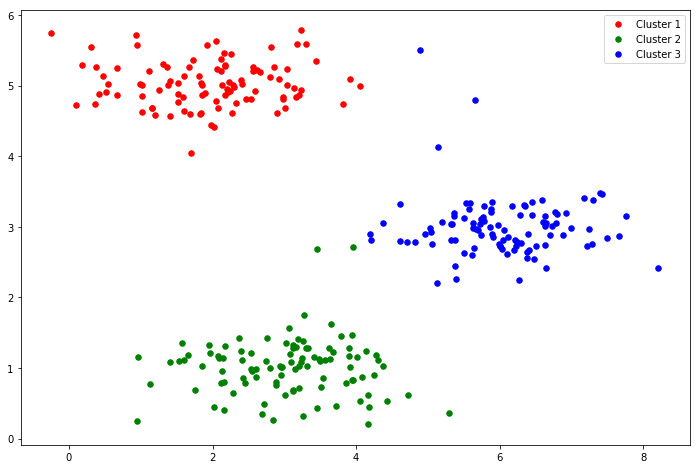

In [84]:
cluster1 = X[idx==0,:]
cluster2 = X[idx==1,:]
cluster3 = X[idx==2,:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()

## 对图像进行压缩
我们的下一个任务是将K-means应用于图像压缩。 从下面的演示可以看到，我们可以使用聚类来找到最具代表性的少数颜色，并使用聚类分配将原始的24位颜色映射到较低维的颜色空间。

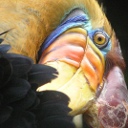

In [85]:
from IPython.display import  Image
Image(filename = "./data/bird_small.png")

In [87]:
image_data = loadmat('data/bird_small.mat')
image_data
A = image_data['A']
A.shape

(128, 128, 3)

In [88]:
# normalize value ranges
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [90]:
temp = np.random.rand(2,3)

In [91]:
temp

array([[0.52004423, 0.39058847, 0.67986313],
       [0.21135065, 0.03189234, 0.43160064]])

In [94]:
temp[(0,1,0,1,1,1),:]

array([[0.52004423, 0.39058847, 0.67986313],
       [0.21135065, 0.03189234, 0.43160064],
       [0.52004423, 0.39058847, 0.67986313],
       [0.21135065, 0.03189234, 0.43160064],
       [0.21135065, 0.03189234, 0.43160064],
       [0.21135065, 0.03189234, 0.43160064]])

In [96]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = find_cosest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

(16384, 3)

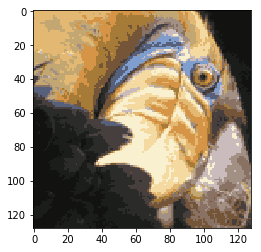

In [97]:
# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape
plt.imshow(X_recovered)
plt.show()

## sklearn实现k-means

In [98]:
A.shape

(128, 128, 3)

In [101]:
data = A.reshape(-1,3)

In [102]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=16,n_init=100,n_jobs=-1)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=100, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

(16, 3)
(16384,)
(16384, 3)


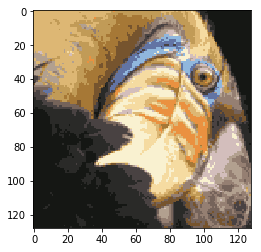

In [103]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(data)
print(C.shape)

print(centroids[C].shape)
recovr_pic = centroids[C].reshape((128,128,3))
plt.imshow(recovr_pic)
plt.show()

# PCA分析

![pca1](./Image/pca1.png)
![pca1](./Image/pca2.png)

假使我们正在针对一张 100×100像素的图片进行某个计算机视觉的机器学习，即总共有10000 个特征。

* 第一步是运用主要成分分析将数据压缩至1000个特征

* 然后对训练集运行学习算法

* 在预测时，采用之前学习而来的Ureduce将输入的特征x转换成特征向量，然后再进行预测
注：如果我们有交叉验证集合测试集，也采用对训练集学习而来的。

错误的主要成分分析情况：一个常见错误使用主要成分分析的情况是，将其用于减少过拟合（减少了特征的数量）。这样做非常不好，不如尝试正则化处理。原因在于主要成分分析只是近似地丢弃掉一些特征，它并不考虑任何与结果变量有关的信息，因此可能会丢失非常重要的特征。然而当我们进行正则化处理时，会考虑到结果变量，不会丢掉重要的数据。

另一个常见的错误是，默认地将主要成分分析作为学习过程中的一部分，这虽然很多时候有效果，最好还是从所有原始特征开始，只在有必要的时候（算法运行太慢或者占用太多内存）才考虑采用主要成分分析。

## 2D数据PCA

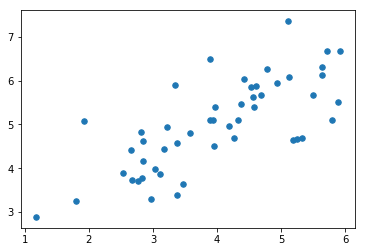

In [104]:
data = loadmat('data/ex7data1.mat')
X = data["X"]

plt.scatter(X[:,0],X[:,1],s=30)
plt.show()

PCA的算法相当简单。 在确保数据被**归一化**之后，输出仅仅是原始数据的协方差矩阵的**奇异值分解**。

In [105]:
def pca(X):
    X = (X - np.mean(X,axis=0))/np.std(X,axis=0)
    cov = X.T@X/X.shape[0]
    U,S,V = np.linalg.svd(cov)
    return U,S,V

In [107]:
U,S,V = pca(X)
U,S,V

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([1.73553038, 0.26446962]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [108]:
X.shape

(50, 2)

In [111]:
def project_data(X,U,k):
    U_reduced = U[:,:k]
    return U_reduced.T@X.T

In [114]:
Z = project_data(X,U,1)
Z
print(Z.shape)

(1, 50)


In [115]:
def recover_data(Z,U,k):
    U_reduced = U[:,:k]
    return (U_reduced@Z).T

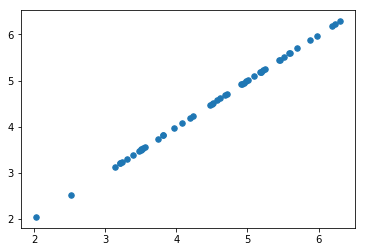

In [117]:
X_recovered = recover_data(Z, U, 1)
X_recovered
plt.scatter(X_recovered[:,0],X_recovered[:,1],s=30)
plt.show()

## PCA用于人脸图像

In [118]:
faces = loadmat('data/ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

In [119]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

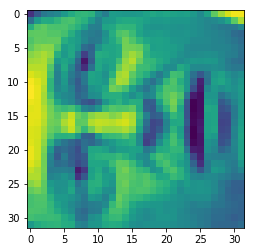

In [120]:
face = np.reshape(X[3,:], (32, 32))
plt.imshow(face)
plt.show()

我们的下一步是在面数据集上运行PCA，并取得前100个主要特征。

In [124]:
U, S, V = pca(X)
Z = project_data(X, U, 100)
print(Z.shape)  # 将1024-> 100维度

(100, 5000)


现在我们可以尝试恢复原来的结构并再次渲染。

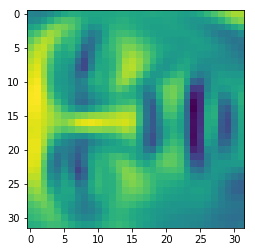

In [122]:
X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[3,:], (32, 32))
plt.imshow(face)
plt.show()